In [1]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
# load model from path
model= tf.saved_model.load(r"C:\Users\phani\OneDrive\Trainings\IP Training AI\AI and Deep Learning using TensorFLow\Module 5\In-Class Demo\ObjectDetection Model\faster_rcnn_resnet50_v1_640x640_coco17_tpu-8\saved_model")
# model= tf.saved_model.load(r"C:\Users\phani\OneDrive\Trainings\IP Training AI\AI and Deep Learning using TensorFLow\Module 5\In-Class Demo\ObjectDetection Model\efficientdet_d7_coco17_tpu-32\saved_model")

https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

In [5]:
def read_label_map(label_map_path):

    item_id = None
    item_name = None
    items = {}
    
    with open(label_map_path, "r") as file:
        for line in file:
            line.replace(" ", "")
            if line == "item{":
                pass
            elif line == "}":
                pass
            elif "id" in line:
                item_id = int(line.split(":", 1)[1].strip())
            elif "display_name" in line:
                item_name = line.split(":", 1)[1].replace("'", "").replace('"', "").strip()

            if item_id is not None and item_name is not None:
                items[item_id] = item_name
                item_id = None
                item_name = None

    return items

In [6]:
class_names= read_label_map(r"C:\Users\phani\OneDrive\Trainings\IP Training AI\AI and Deep Learning using TensorFLow\Module 5\In-Class Demo\coco_classes.pbtxt")

In [7]:
class_names

{1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 27: 'backpack',
 28: 'umbrella',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65: 'bed',
 67: 'dining table',
 70: 'toilet',
 72: 'tv',
 73: 'laptop',
 74: 'mo

### Load Image

In [19]:
# read image and preprocess
# img = cv2.imread(r"C:\Users\phani\OneDrive\Trainings\IP Training AI\AI and Deep Learning using TensorFLow\Module 5\In-Class Demo\images_to_test\Street.jpg")
# img = cv2.imread(r"C:\Users\phani\OneDrive\Trainings\IP Training AI\AI and Deep Learning using TensorFLow\Module 5\In-Class Demo\images_to_test\bench.jpg")
# img = cv2.imread(r"C:\Users\phani\OneDrive\Trainings\IP Training AI\AI and Deep Learning using TensorFLow\Module 5\In-Class Demo\images_to_test\street2.jpg")
# img = cv2.imread(r"C:\Users\phani\OneDrive\Trainings\IP Training AI\AI and Deep Learning using TensorFLow\Module 5\In-Class Demo\images_to_test\tennis.jpg")
# img = cv2.imread(r"C:\Users\phani\OneDrive\Trainings\IP Training AI\AI and Deep Learning using TensorFLow\Module 5\In-Class Demo\images_to_test\indoor_001.jpg")
# img = cv2.imread(r"C:\Users\phani\Downloads\obj_det_1.jpg")
img = cv2.imread(r"C:\Users\phani\Downloads\animals_002.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Optional 

# # get height and width of image
h, w, _ = img.shape

input_tensor = np.expand_dims(img, 0)

# # predict from model
resp = model(input_tensor)

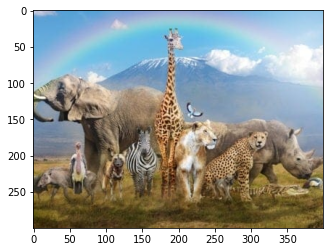

In [20]:
plt.imshow(img)
plt.show()

In [12]:
resp

{'raw_detection_boxes': <tf.Tensor: shape=(1, 300, 4), dtype=float32, numpy=
 array([[[0.7159991 , 0.19321743, 0.9736857 , 0.25892717],
         [0.03110682, 0.27347967, 0.17438601, 0.3117154 ],
         [0.69657713, 0.4505717 , 0.75241685, 0.5320627 ],
         ...,
         [0.6817381 , 0.9107221 , 0.94023865, 0.99221224],
         [0.06124674, 0.08900427, 0.18466775, 0.12367614],
         [0.74887526, 0.20047288, 0.9001235 , 0.25050274]]], dtype=float32)>,
 'detection_multiclass_scores': <tf.Tensor: shape=(1, 300, 91), dtype=float32, numpy=
 array([[[2.66380468e-03, 9.96908367e-01, 8.15554176e-06, ...,
          6.91097785e-06, 2.11768656e-06, 1.76334402e-06],
         [7.09961494e-03, 1.09566805e-04, 1.23472603e-06, ...,
          5.55461993e-05, 5.28374449e-06, 1.40145823e-06],
         [1.17899049e-02, 2.64764694e-05, 1.61218043e-06, ...,
          1.61951339e-05, 9.42640600e-06, 9.41343728e-07],
         ...,
         [9.58234191e-01, 2.28023678e-02, 1.32067420e-03, ...,
       

In [21]:
resp.keys()

dict_keys(['raw_detection_boxes', 'detection_multiclass_scores', 'detection_classes', 'detection_boxes', 'raw_detection_scores', 'num_detections', 'detection_anchor_indices', 'detection_scores'])

In [12]:
resp["detection_boxes"]

<tf.Tensor: shape=(1, 300, 4), dtype=float32, numpy=
array([[[0.7159991 , 0.19321743, 0.9736857 , 0.25892717],
        [0.03110682, 0.27347967, 0.17438601, 0.3117154 ],
        [0.3116707 , 0.5684569 , 0.426075  , 0.60177827],
        ...,
        [0.7088962 , 0.09195484, 0.757197  , 0.11241566],
        [0.06839886, 0.04934851, 0.16369456, 0.07831131],
        [0.5894735 , 0.60258   , 0.6418991 , 0.61902905]]], dtype=float32)>

In [22]:
resp["detection_classes"]

<tf.Tensor: shape=(1, 300), dtype=float32, numpy=
array([[ 1., 43., 37., 37., 37., 37., 37., 37., 37., 37., 84., 37., 35.,
        43., 84., 75., 53., 37., 40., 84., 34., 53., 35., 39., 42., 75.,
         1., 77., 77., 84., 39., 53., 77., 40., 37., 84., 53., 43., 75.,
        38., 75., 49., 37., 34., 40., 75., 75., 77., 77., 55., 75., 53.,
        77., 53., 84., 53., 40.,  1., 77., 53., 84.,  9., 47., 40., 37.,
        32., 32., 32., 43., 47.,  1., 40., 77.,  9., 39., 75., 40., 75.,
        75., 53., 40., 47., 62., 75., 37., 37., 32., 47., 43., 84., 51.,
        40., 75., 43., 27., 40., 32.,  1., 37., 32., 75., 39., 55., 84.,
        43., 42., 16., 75., 47., 34., 37., 75., 75., 47., 55., 40., 43.,
        77., 84., 37.,  1., 40., 55.,  1., 37., 40., 55., 77., 40., 77.,
        40., 47., 75., 32., 37., 77.,  1., 43., 40., 28., 32., 39., 37.,
        84., 55., 31., 67., 36., 40.,  2., 40.,  1., 43., 75., 47., 77.,
        84., 49., 32., 84., 43.,  1., 35., 77., 50., 49., 53., 87.,  1.,
 

In [14]:
resp["detection_scores"]

<tf.Tensor: shape=(1, 300), dtype=float32, numpy=
array([[0.99690837, 0.9917681 , 0.987643  , 0.983546  , 0.9750499 ,
        0.9695478 , 0.9621539 , 0.95674086, 0.82092637, 0.7903    ,
        0.7189793 , 0.7079417 , 0.68032914, 0.6574613 , 0.63604975,
        0.6354092 , 0.6023066 , 0.58824325, 0.58473086, 0.47488236,
        0.4351444 , 0.41113624, 0.37781745, 0.35739982, 0.34362662,
        0.3094209 , 0.27552387, 0.25077516, 0.21918099, 0.21645361,
        0.21221128, 0.20990846, 0.20729601, 0.20159167, 0.20128004,
        0.198123  , 0.19631895, 0.18521939, 0.18313782, 0.17445181,
        0.16759254, 0.16367054, 0.15960695, 0.15359084, 0.12496862,
        0.12131241, 0.11525805, 0.10316248, 0.0993905 , 0.09477286,
        0.09376067, 0.09235881, 0.09152838, 0.08864371, 0.08839171,
        0.08806586, 0.08511584, 0.0832404 , 0.07831597, 0.07723885,
        0.07232548, 0.06928796, 0.0651615 , 0.062566  , 0.06144002,
        0.06098647, 0.05931047, 0.05646438, 0.05551637, 0.05426972

In [23]:
# iterate over boxes, class_index and score list
for boxes, classes, scores in zip(resp['detection_boxes'].numpy(), resp['detection_classes'].numpy().astype(int), resp['detection_scores'].numpy()):
    for box, cls, score in zip(boxes, classes, scores): # iterate over sub values in list
        if score > 0.5: # we are using only detection with confidence of over 0.8
            ymin = int(box[0] * h)
            xmin = int(box[1] * w)
            ymax = int(box[2] * h)
            xmax = int(box[3] * w)
            # write text classname for bounding box
            cv2.putText(img, class_names[cls], (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
            # draw on image (bounding box)
            cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (128, 0, 128), 4)
            print(class_names[cls])

# convert back to bgr and save image
cv2.imwrite("output.png", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

zebra
giraffe
elephant
sheep
dog
sheep
sheep


True

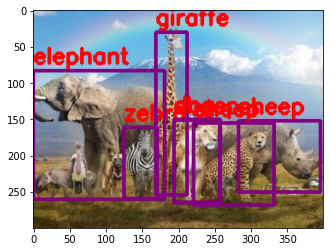

In [22]:
plt.imshow(img)
plt.show()